<a href="https://colab.research.google.com/github/sonti6/Dada-Tweet-Analysis-/blob/master/Twitter_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install -qq twint
!pip install -qq whatthelang

     |████████████████████████████████| 1.2MB 5.1MB/s 
     |████████████████████████████████| 245kB 14.8MB/s 
     |████████████████████████████████| 102kB 6.6MB/s 
     |████████████████████████████████| 256kB 16.5MB/s 
     |████████████████████████████████| 153kB 17.7MB/s 
     |████████████████████████████████| 235kB 16.3MB/s 
     |████████████████████████████████| 788kB 2.8MB/s 
     |████████████████████████████████| 102kB 7.8MB/s 
     |████████████████████████████████| 245kB 12.8MB/s 


In [2]:
pip install plotly --upgrade

     |████████████████████████████████| 11.5MB 1.7MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [0]:
import twint 

In [41]:
import pandas as pd
from pandas_datareader import data
import numpy as np
import datetime
import seaborn as sns
%matplotlib inline

In [42]:
from whatthelang import WhatTheLang
wtl = WhatTheLang()

In [43]:
from bs4 import BeautifulSoup

In [44]:
import re
import pickle # pickle is for storing element...pickling... you can store any kind of python object with that
import requests as rq

In [45]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
from plotly.offline import iplot
import matplotlib.pyplot as plt
import matplotlib as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [46]:
from matplotlib import *
import sys
from pylab import *

In [47]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [48]:
import IPython
IPython.get_ipython().events.register('pre_run_cell', configure_plotly_browser_state)

In [49]:
import plotly
import plotly.graph_objs as go

In [14]:
c = twint.Config()
c.Store_object = True
c.Pandas =True
c.Search = "@Srisrimangeshda"
c.Limit = 100000
c.Lang = 'en'

In [0]:
twint.run.Search(c)

In [16]:
dada_tweet = twint.storage.panda.Tweets_df

In [17]:
dada_tweet.to_csv(r'/content/drive/My Drive/Shared Env/Dada_Tweet Data/Tweet_info.xlsx', index = False)

In [18]:
dada_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12527 entries, 0 to 12526
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               12527 non-null  object
 1   conversation_id  12527 non-null  object
 2   created_at       12527 non-null  int64 
 3   date             12527 non-null  object
 4   timezone         12527 non-null  object
 5   place            12527 non-null  object
 6   tweet            12527 non-null  object
 7   hashtags         12527 non-null  object
 8   cashtags         12527 non-null  object
 9   user_id          12527 non-null  int64 
 10  user_id_str      12527 non-null  object
 11  username         12527 non-null  object
 12  name             12527 non-null  object
 13  day              12527 non-null  int64 
 14  hour             12527 non-null  object
 15  link             12527 non-null  object
 16  retweet          12527 non-null  bool  
 17  nlikes           12527 non-null

In [19]:
dada_tweet = twint.storage.panda.Tweets_df.drop_duplicates(subset=['id'])

In [20]:
range(len(dada_tweet))

range(0, 12527)

In [0]:
dada_tweet.head()

id      conversation_id  ...  trans_src trans_dest
0  1265205352301318144  1264355228054364164  ...                      
1  1264866879341858817  1264355228054364164  ...                      
2  1264452411894054913  1264355228054364164  ...                      
3  1264421864471965696  1264355228054364164  ...                      
4  1264408861513048065  1264355228054364164  ...                      

[5 rows x 33 columns]

In [21]:
dada_tweet['nlikes'].count()

12527

In [22]:
dada_tweet['tweet'].count()

12527

In [23]:
r = rq.get('https://twimlai.com/shows/')

In [24]:
soup = BeautifulSoup(r.text)

In [25]:
links = soup.find_all('a')

In [26]:
links = [l.attrs['href'] for l in links if l.attrs['href'].startswith('https://twimlai.com/twiml-talk')]

In [27]:
links = list(set(links))

In [28]:
dada_tweet.describe()

created_at       user_id  ...      nreplies     nretweets
count  1.252700e+04  1.252700e+04  ...  12527.000000  12527.000000
mean   1.515947e+12  2.107431e+17  ...      0.989543      4.457252
std    4.795175e+10  3.846705e+17  ...      4.842610     10.910603
min    1.400592e+12  1.999966e+07  ...      0.000000      0.000000
25%    1.481601e+12  2.507950e+09  ...      0.000000      1.000000
50%    1.529819e+12  2.800151e+09  ...      0.000000      2.000000
75%    1.553794e+12  4.273858e+09  ...      0.000000      3.000000
max    1.590483e+12  1.220755e+18  ...     54.000000    134.000000

[8 rows x 6 columns]

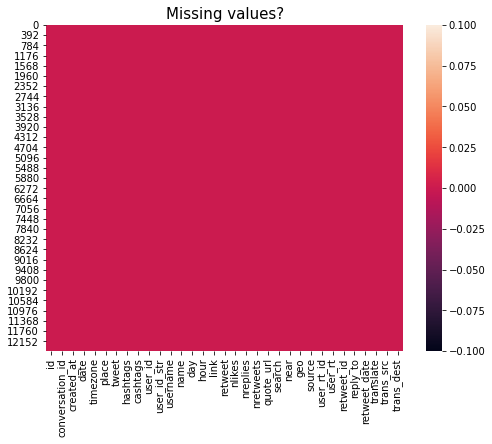

In [36]:
plt.figure(figsize=(8,6))
sns.heatmap(dada_tweet.isnull())
plt.title("Missing values?", fontsize = 15)
plt.show()

In [37]:
dada_tweet["date"] = pd.to_datetime(dada_tweet["date"])
dada_tweet["date"].apply(lambda x: x.year)

0        2020
1        2020
2        2020
3        2020
4        2020
         ... 
12522    2014
12523    2014
12524    2014
12525    2014
12526    2014
Name: date, Length: 12527, dtype: int64

In [39]:
dada_tweet.reset_index(inplace=True)
dada_tweet['day'] = dada_tweet['date'].dt.day
dada_tweet['month'] = dada_tweet['date'].dt.month
dada_tweet['year'] = dada_tweet['date'].dt.year


In [40]:
dada_tweet.iplot(kind = 'bar', x = 'year', y= 'nlikes' )

In [50]:
dada_tweet.iplot(kind = 'bar', x = 'year', y= 'nreplies' )

In [51]:
dada_tweet.iplot(kind = 'bar', x = 'year', y= 'nretweets' )

In [0]:
from matplotlib.figure import Figure
from matplotlib import *
import sys
from pylab import *
import matplotlib.pyplot as plt

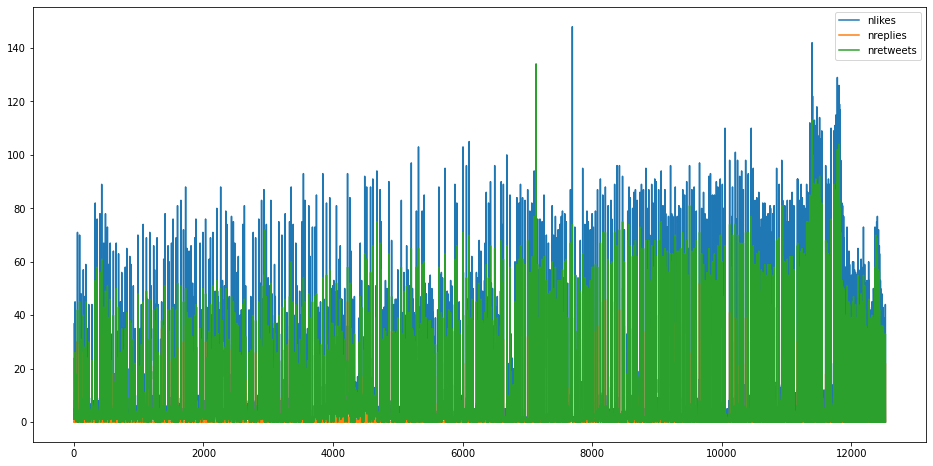

In [52]:
dada_tweet['nlikes'].plot(figsize=(16,8))
dada_tweet['nreplies'].plot(figsize=(16,8))
dada_tweet[ 'nretweets'].plot(figsize=(16,8))
plt.legend()

In [0]:
dada_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12527 entries, 0 to 12526
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   index            12527 non-null  int64         
 1   conversation_id  12527 non-null  object        
 2   created_at       12527 non-null  int64         
 3   date             12527 non-null  datetime64[ns]
 4   timezone         12527 non-null  object        
 5   place            12527 non-null  object        
 6   tweet            12527 non-null  object        
 7   hashtags         12527 non-null  object        
 8   cashtags         12527 non-null  object        
 9   user_id          12527 non-null  int64         
 10  user_id_str      12527 non-null  object        
 11  username         12527 non-null  object        
 12  name             12527 non-null  object        
 13  day              12527 non-null  int64         
 14  hour             12527 non-null  objec

In [0]:
dada_tweet['tweet'].apply(lambda x: x.split('#HHSadguruYogirajDrMangeshda')[0]).value_counts()

Thank you                                                                                                                                                          575
Congratulations                                                                                                                                                     86
Thank You                                                                                                                                                           60
Best wishes to                                                                                                                                                      46
Heartiest congratulations                                                                                                                                           44
                                                                                                                                                                  ...

In [0]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")

In [0]:
dada_tweet["tweet"].count()

10014

In [0]:
import warnings; warnings.simplefilter('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import re
from wordcloud import WordCloud
import textwrap
from sklearn.cluster import KMeans
from absl import logging
import tensorflow_hub as hub

In [0]:
dada_tweet['date'].dtype

dtype('O')

In [0]:
print(dada_tweet['date'].head())

0    2020-05-11 05:37:44
1    2020-05-10 10:42:13
2    2020-05-10 07:30:05
3    2020-05-10 06:49:29
4    2020-05-10 05:46:56
Name: date, dtype: object


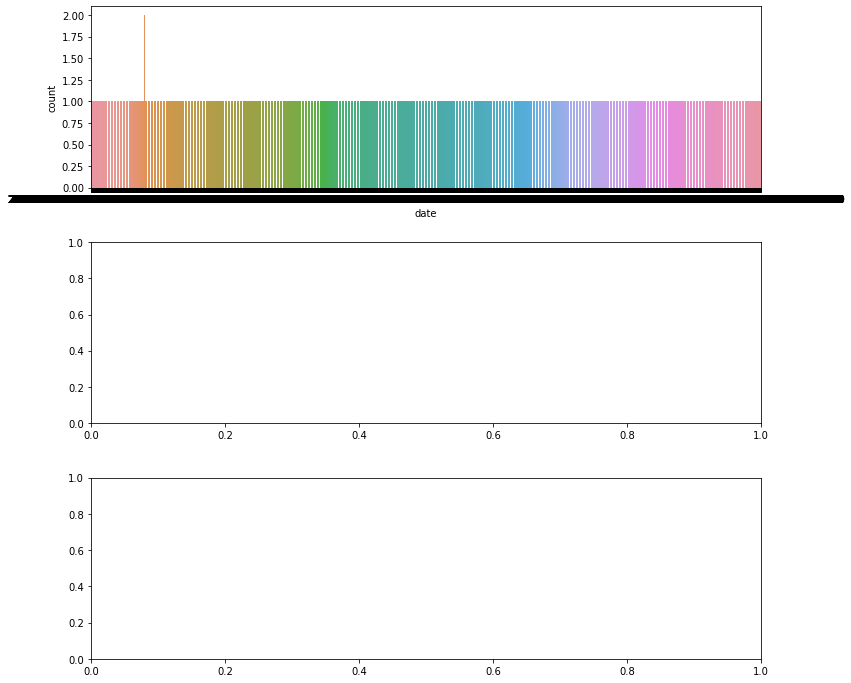

In [54]:
fig, ax = plt.subplots(3,1,figsize=(12,12))
plt.subplots_adjust(hspace=0.3)
sns.countplot(x='date', data=dada_tweet, ax=ax[0])

In [0]:
dada_tweet['date'] = pd.to_datetime(dada_tweet['date'])
dada_tweet['year'], dada_tweet['month'] = dada_tweet['date'].dt.year, dada_tweet['date'].dt.month
dada_tweet

id      conversation_id  ...  year month
0      1259719317429481473  1259719317429481473  ...  2020     5
1      1259433556197007363  1259280549438533632  ...  2020     5
2      1259385202104692736  1259280549438533632  ...  2020     5
3      1259374985203707904  1259280549438533632  ...  2020     5
4      1259359245864140801  1259359245864140801  ...  2020     5
...                    ...                  ...  ...   ...   ...
10009   748758435542364160   748684578223689728  ...  2016     7
10010   748757051367579648   748684578223689728  ...  2016     7
10011   748752665937448965   748684578223689728  ...  2016     7
10012   748741443833827328   748684578223689728  ...  2016     7
10013   748736987973099521   748684578223689728  ...  2016     7

[10014 rows x 35 columns]

In [60]:
rand_indexs = np.random.randint(1,len(dada_tweet),50).tolist()
dada_tweet["tweet"][rand_indexs]

10365                @Srisrimangeshda wishing you the same
5985     Congratulations #SadguruSriSriDrMangeshda\n#Gl...
2635                           Lovely enlightening message
6123     Sadguruji's each message is very unique giving...
5598     Thank you #SadguruYogirajSriSriDrMangeshda for...
10062     All the best to Sadguruji and the Hyderabad team
8728            Thank you for the divine message. Hari Om.
9249     amazing news and a great blessing for the woma...
3537     @SMKYF @SMKYF1 Wonderful news. Best of luck Sa...
11590    @Srisrimangeshda @narendramodi excellent progr...
10979    @Srisrimangeshda congratulations to both the k...
10379    @Srisrimangeshda a very happy  and proud momen...
171      RIP Irfan. We will miss you and your comic tim...
5694     Thank you #SadguruYogirajSriSriDrMangeshda  fo...
8418     Thank You Sadguruji for guiding us in a beauti...
3442     Superb initiative to promote #VasantPanchami #...
10510    @Srisrimangeshda well organized  packed audien.

In [61]:
import re
tweets_text = dada_tweet.tweet.str.cat()
emos = set(re.findall(r" ([xX:;][-']?.) ",tweets_text))
emos_count = []
for emo in emos:
    emos_count.append((tweets_text.count(emo), emo))
sorted(emos_count,reverse=True)

[(7, ':)')]

In [63]:
import nltk
from nltk.tokenize import word_tokenize

In [70]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [64]:
def most_used_words(text):
    tokens = word_tokenize(text)
    frequency_dist = nltk.FreqDist(tokens)
    print("There is %d different words" % len(set(tokens)))
    return sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)

In [67]:
most_used_words(dada_tweet.tweet.str.cat())[:100]

There is 16714 different words


['#',
 'for',
 '.',
 'the',
 '@',
 'to',
 'you',
 'of',
 'and',
 'Sadguruji',
 'Srisrimangeshda',
 '!',
 'your',
 ',',
 'HHSadguruYogirajDrMangeshda',
 'all',
 'a',
 'on',
 'in',
 'wishes',
 'You',
 'Thank',
 '&',
 'KriyaYoga',
 'this',
 'SMKYF',
 'by',
 'blessings',
 'message',
 'congratulations',
 'very',
 'Your',
 'Yoga',
 'divine',
 ':',
 'with',
 'best',
 'is',
 '...',
 'us',
 'Congratulations',
 'our',
 'Happy',
 'great',
 'be',
 'day',
 'at',
 'are',
 'Sadguru',
 'Om',
 'Jai',
 'Mangeshda',
 'NectarDrops',
 'from',
 "'s",
 'wonderful',
 'Kriya',
 'participants',
 'will',
 'narendramodi',
 'Divine',
 'proud',
 'happy',
 'yoga',
 'much',
 'https',
 'Hari',
 'guidance',
 'team',
 'Best',
 'was',
 'moment',
 'Wishing',
 'SadguruSriSriDrMangeshda',
 'We',
 'we',
 'auspicious',
 'world',
 'SMKYF1',
 'family',
 'it',
 'Blessings',
 'initiative',
 'session',
 'Great',
 'Thanks',
 'new',
 'everyone',
 'blessed',
 'All',
 'have',
 'more',
 'love',
 'my',
 'such',
 'A',
 'work',
 'India',


In [68]:
from nltk.corpus import stopwords

In [71]:
mw = most_used_words(dada_tweet.tweet.str.cat())
most_words = []
for w in mw:
    if len(most_words) == 1000:
        break
    if w in stopwords.words("english"):
        continue
    else:
        most_words.append(w)

There is 16714 different words


In [72]:
sorted(most_words)

['!',
 '#',
 '&',
 "'",
 "''",
 "'s",
 '(',
 ')',
 ',',
 '-',
 '.',
 '..',
 '...',
 '.Congratulations',
 '.Thank',
 '//mangeshda.org',
 '//www.mangeshda.org',
 '1st',
 '2',
 '2018',
 '2019',
 '21st',
 '21stJune2019',
 '2nd',
 '3',
 '365DayYoga',
 '4',
 '5',
 '50',
 '50Years',
 '50years',
 '7',
 '90th',
 '93rd',
 '9th',
 ':',
 ';',
 '?',
 '@',
 'A',
 'Aakashwani',
 'Akshay',
 'AkshayaTritiya',
 'All',
 'Amazing',
 'An',
 'And',
 'April',
 'Auspicious',
 'Award',
 'Awesome',
 'Bali',
 'BeFitWithYoga',
 'Beautiful',
 'Best',
 'Bharat',
 'Birthday',
 'Blessed',
 'Blessings',
 'BlessingsThank',
 'Buddha',
 'BuddhaPurnima',
 'CMOMaharashtra',
 'COVID2019',
 'Cc',
 'Centre',
 'Chandrayaan2',
 'Chaturthi',
 'Chief',
 'Christmas',
 'Citizens',
 'Cleanliness',
 'Competition',
 'Congrats',
 'Congratulations',
 'CulturalDay',
 'Da',
 'Dada',
 'Day',
 'Delhi',
 'Dev_Fadnavis',
 'Diksha',
 'District',
 'Divine',
 'Diwali',
 'Doctors',
 'Dr',
 'Dr.',
 'Dr.Mangeshda',
 'Dubai',
 'Dussehra',
 'Dusshera